In [1]:
import tweepy
import csv
import pandas as pd
import numpy as np

# %load_ext autoreload
# %autoreload 2

# Use TwitterAPI for Draftkings and FanDuel Tweets over the last week (API limitation)
   Dates =  24 NOV - 01 DEC
    

In [ ]:
dk_hashtags = ['#DraftKings', '#DraftKings_bet', '#DK_Assist', '#DKSportsbook', '#dks', 
               '#DraftKingsNews', '#dkuk', '#DraftKings_AUS', '#DKCasino' ] 
fd_hashtags = ['#FanDuel', '#FDSportsbook', '#FanDuel_Support']

In [ ]:
#Twitter credentials
consumer_key = 'Y6mRvbhFaZinGb3HMbaekWLk9'
consumer_secret = 'R1IWmvvddzAwoJsB3iBogjm8dbncGfiPep5T56D05tZPfUUwBa'
access_token = '2888838179-DPfnSZyVwbzIDoXOYOeFfsnA83ySwM2ApgRIHtA'
access_token_secret = 'jIw68X4pGlSV3cb58urKrL8mm7EobdtBf9d6XE6XS5MEg'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
def get_tweets(hashtag_list, file_name):
    # Open/Create a file to append data
    csvFile = open(file_name, 'a')
    csvWriter = csv.writer(csvFile)
    for hashtag in hashtag_list:
        for tweet in tweepy.Cursor(api.search,q=hashtag,count=5000,
                           result = 'recent', include_entities=True,
                           lang="en",
                           since="2020-11-23").items():
#             print(tweet.created_at, tweet.text)
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), 
                        tweet.user.screen_name, tweet.user.location,
                        tweet.user.followers_count, tweet.user.friends_count,
                        tweet.retweet_count, tweet.source])
   

In [ ]:
get_tweets(dk_hashtags, 'data/dk.csv')

In [ ]:
get_tweets(fd_hashtags, 'data/fd.csv')

# Process data into Pandas and conduct EDA

In [549]:
dk_df = pd.read_csv('data/dk.csv')
dk_df.columns= ['created', 'text', 'username', 'location', 'follower count', 'friend count', 'retweet', 'source']
pd.set_option("display.max_colwidth", -1)

fd_df = pd.read_csv('data/fd.csv')
fd_df.columns= ['created', 'text', 'username', 'location', 'follower count', 'friend count', 'retweet', 'source']
pd.set_option("display.max_colwidth", -1)

/Users/LMC/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/LMC/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


## DRAFTKINGS EDA

In [550]:
dk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8931 entries, 0 to 8930
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         8931 non-null   object
 1   text            8931 non-null   object
 2   username        8931 non-null   object
 3   location        6491 non-null   object
 4   follower count  8931 non-null   int64 
 5   friend count    8931 non-null   int64 
 6   retweet         8931 non-null   int64 
 7   source          8374 non-null   object
dtypes: int64(3), object(5)
memory usage: 558.3+ KB


In [551]:
moneygang = dk_df[dk_df.text== "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
moneygang

,created,text,username,location,follower count,friend count,retweet,source
1316,2020-11-29 20:47:55,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',ukL1XNjBzqw2vcw,NaN,6,826,632,Twitter Web App
1342,2020-11-29 19:55:47,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',kindnesshp,NaN,1,104,632,Twitter for Android
1384,2020-11-29 18:32:56,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',anthoanedawson,NaN,2,185,632,Twitter Web App
1390,2020-11-29 18:05:03,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',Galina97015451,NaN,6,589,632,Twitter Web App
1447,2020-11-29 17:35:07,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',daaamiirna,Москва,1,46,632,Twitter Web App
...,...,...,...,...,...,...,...,...
4704,2020-11-27 10:16:20,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',k9iAz8VV97uAFn8,NaN,10,33,632,Twitter Web App
4709,2020-11-27 07:25:12,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',FmGPBcwiSF2E5nG,NaN,0,256,632,Twitter Web App
4962,2020-11-26 21:05:26,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',MONEYGANGJAMES1,NaN,16013,0,632,Twitter Web App
8898,2020-11-29 20:47:55,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',ukL1XNjBzqw2vcw,NaN,6,826,632,Twitter Web App


In [552]:
len(fd_df.username.unique())

2076

In [553]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         5748 non-null   object
 1   text            5748 non-null   object
 2   username        5748 non-null   object
 3   location        4354 non-null   object
 4   follower count  5748 non-null   int64 
 5   friend count    5748 non-null   int64 
 6   retweet         5748 non-null   int64 
 7   source          5742 non-null   object
dtypes: int64(3), object(5)
memory usage: 359.4+ KB


In [554]:
dk_df.created = pd.to_datetime(dk_df.created).dt.strftime('%m/%d/%Y')
fd_df.created = pd.to_datetime(fd_df.created).dt.strftime('%m/%d/%Y')

In [555]:
dk_grouped = dk_df.created.groupby(dk_df.created).agg('count').to_frame('DK_Count').reset_index()
fd_grouped = fd_df.created.groupby(fd_df.created).agg('count').to_frame('FD_Count').reset_index()
fd_grouped.drop('created', axis=1, inplace=True)
dk_grouped['DK_Percent_Change'] = ((dk_grouped.DK_Count.pct_change().round(2))*100)
fd_grouped['FD_Percent_Change'] = ((fd_grouped.FD_Count.pct_change().round(2))*100)
grouped_percent_change = pd.concat([dk_grouped, fd_grouped],axis=1)
grouped_percent_change.index = grouped_percent_change.created
grouped_percent_change = grouped_percent_change.drop(columns = ['created', 'DK_Count', 'FD_Count'])
grouped_percent_change = grouped_percent_change.replace('nan%', "")
grouped_percent_change = grouped_percent_change.replace('28.000000000000004%', "28.0%")
grouped_percent_change.index.rename('Date', inplace=True)
# grouped_percent_change.reset_index(inplace=True)
grouped_percent_change

,DK_Percent_Change,FD_Percent_Change
Date,,
11/23/2020,NaN,NaN
11/24/2020,-38.0,-18.0
11/25/2020,42.0,28.0
11/26/2020,52.0,33.0
11/27/2020,50.0,71.0
11/28/2020,-24.0,-25.0
11/29/2020,23.0,-0.0
11/30/2020,13.0,-30.0
12/01/2020,-33.0,-19.0


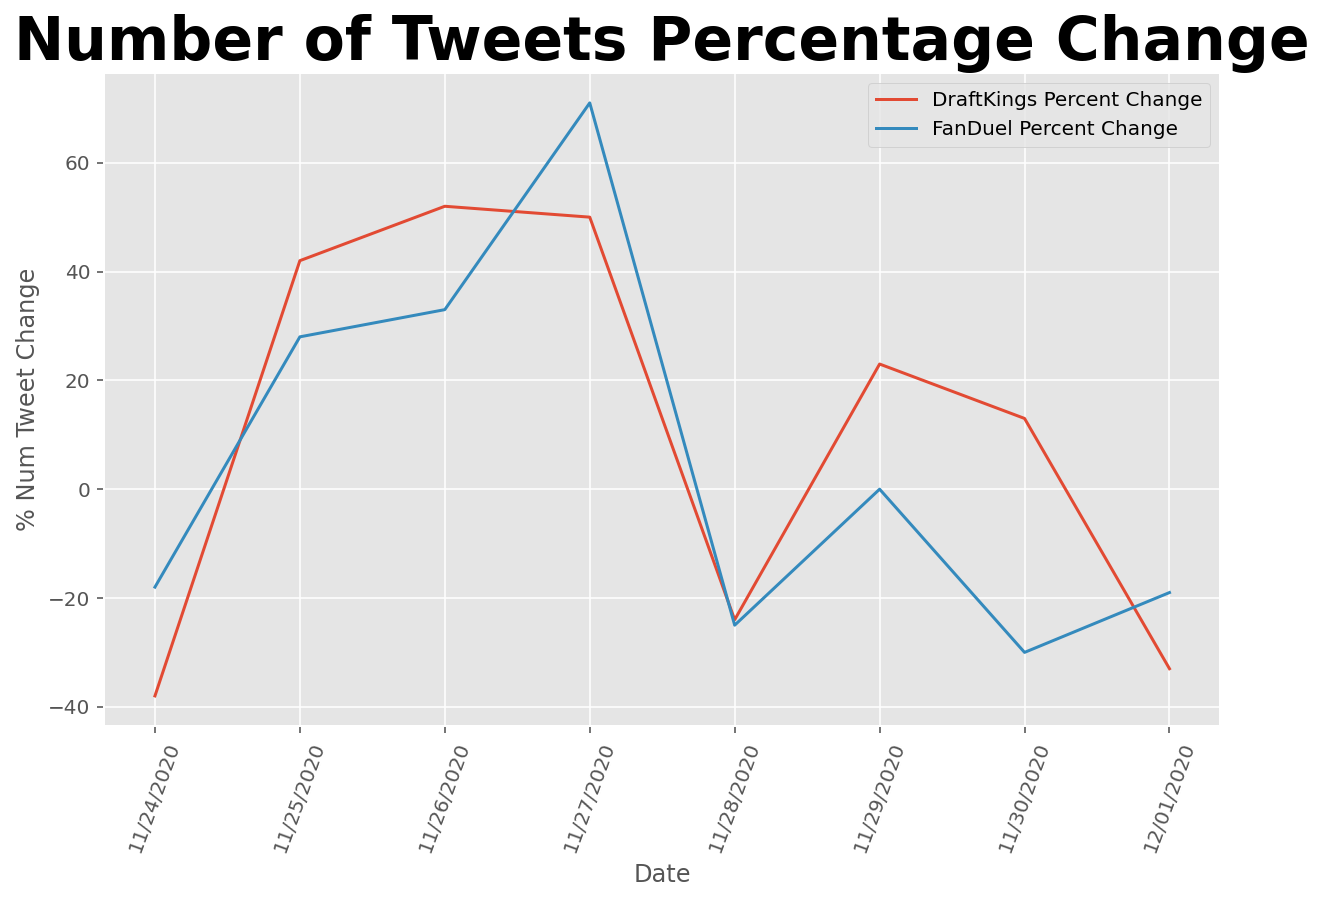

In [556]:
plt.rcParams['figure.figsize'] = (10,6)
grouped_percent_change['DK_Percent_Change'].plot(grid=True, label ='DraftKings Percent Change')
grouped_percent_change['FD_Percent_Change'].plot(grid=True, label ='FanDuel Percent Change')
plt.ylabel('% Num Tweet Change')
plt.xticks(rotation=70)
plt.legend(loc='upper right')
plt.title('Number of Tweets Percentage Change', fontsize=30, fontweight='bold')
plt.savefig('Num_Tweet_Percentage_Change', bbox_inches='tight')

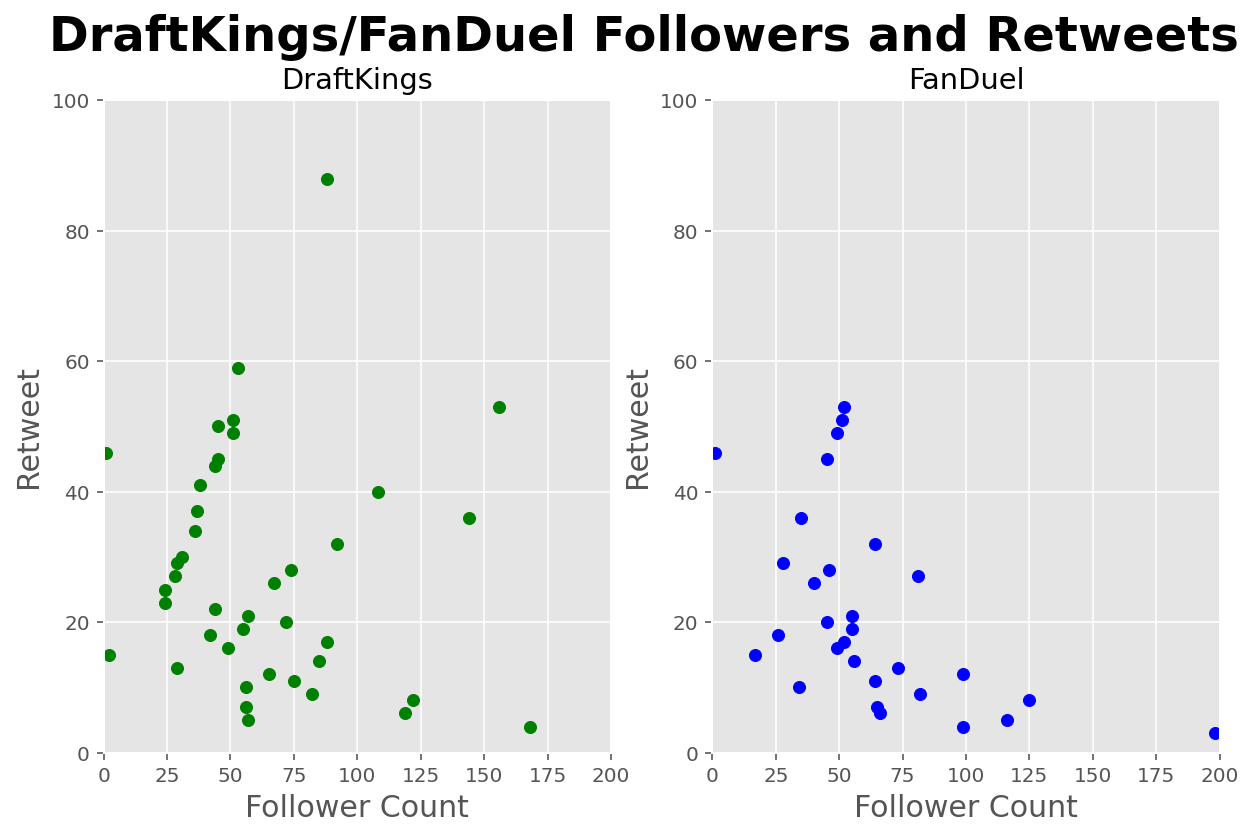

In [557]:
dk_follower_count = dk_df.groupby(dk_df.retweet).agg('count')
dk_follower_count.sort_values(by = "follower count", ascending=False)
dk_follower_count.reset_index(inplace=True)
dk_x = dk_follower_count['follower count']
dk_y = dk_follower_count['retweet']

fd_follower_count = fd_df.groupby(fd_df.retweet).agg('count')
fd_follower_count.sort_values(by = "follower count", ascending=False)
fd_follower_count.reset_index(inplace=True)
fd_x = fd_follower_count['follower count']
fd_y = fd_follower_count['retweet']


from scipy import stats
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(dk_x, dk_y, color='green')
ax1.set_title('DraftKings')
ax1.set_xlim(0, 200)
ax1.set_ylim(0, 100)
ax1.set_xlabel('Follower Count', fontsize=15)
ax1.set_ylabel('Retweet', fontsize=15)

ax2 = fig.add_subplot(122)
ax2.scatter(fd_x, fd_y, color='blue')
ax2.set_title('FanDuel')
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 100)
ax2.set_xlabel('Follower Count', fontsize=15)
ax2.set_ylabel('Retweet', fontsize=15)


fig.suptitle('DraftKings/FanDuel Followers and Retweets', fontsize=24, fontweight='bold')
plt.savefig("Followers and Retweets")
plt.show()

## By Source Type

In [558]:
from collections import Counter
Counter(dk_df.source).most_common(10)

[('Twitter for iPhone', 2919),
 ('Twitter for Android', 2141),
 ('Twitter Web App', 1395),
 ('Sprout Social', 643),
 (nan, 557),
 ('SWM Automated Tweets For Members', 464),
 ('FlashPug ReTweeter Bot', 168),
 ('TweetDeck', 151),
 ('IFTTT', 80),
 ('Khoros', 64)]

In [559]:
from collections import Counter
Counter(fd_df.source).most_common(10)

[('Twitter for Android', 1747),
 ('Twitter for iPhone', 1683),
 ('Twitter Web App', 829),
 ('Sprout Social', 589),
 ('SWM Automated Tweets For Members', 374),
 ('FlashPug ReTweeter Bot', 130),
 ('IFTTT', 94),
 ('TweetDeck', 83),
 ('Zapier.com', 43),
 ('Sports from the Basement', 25)]

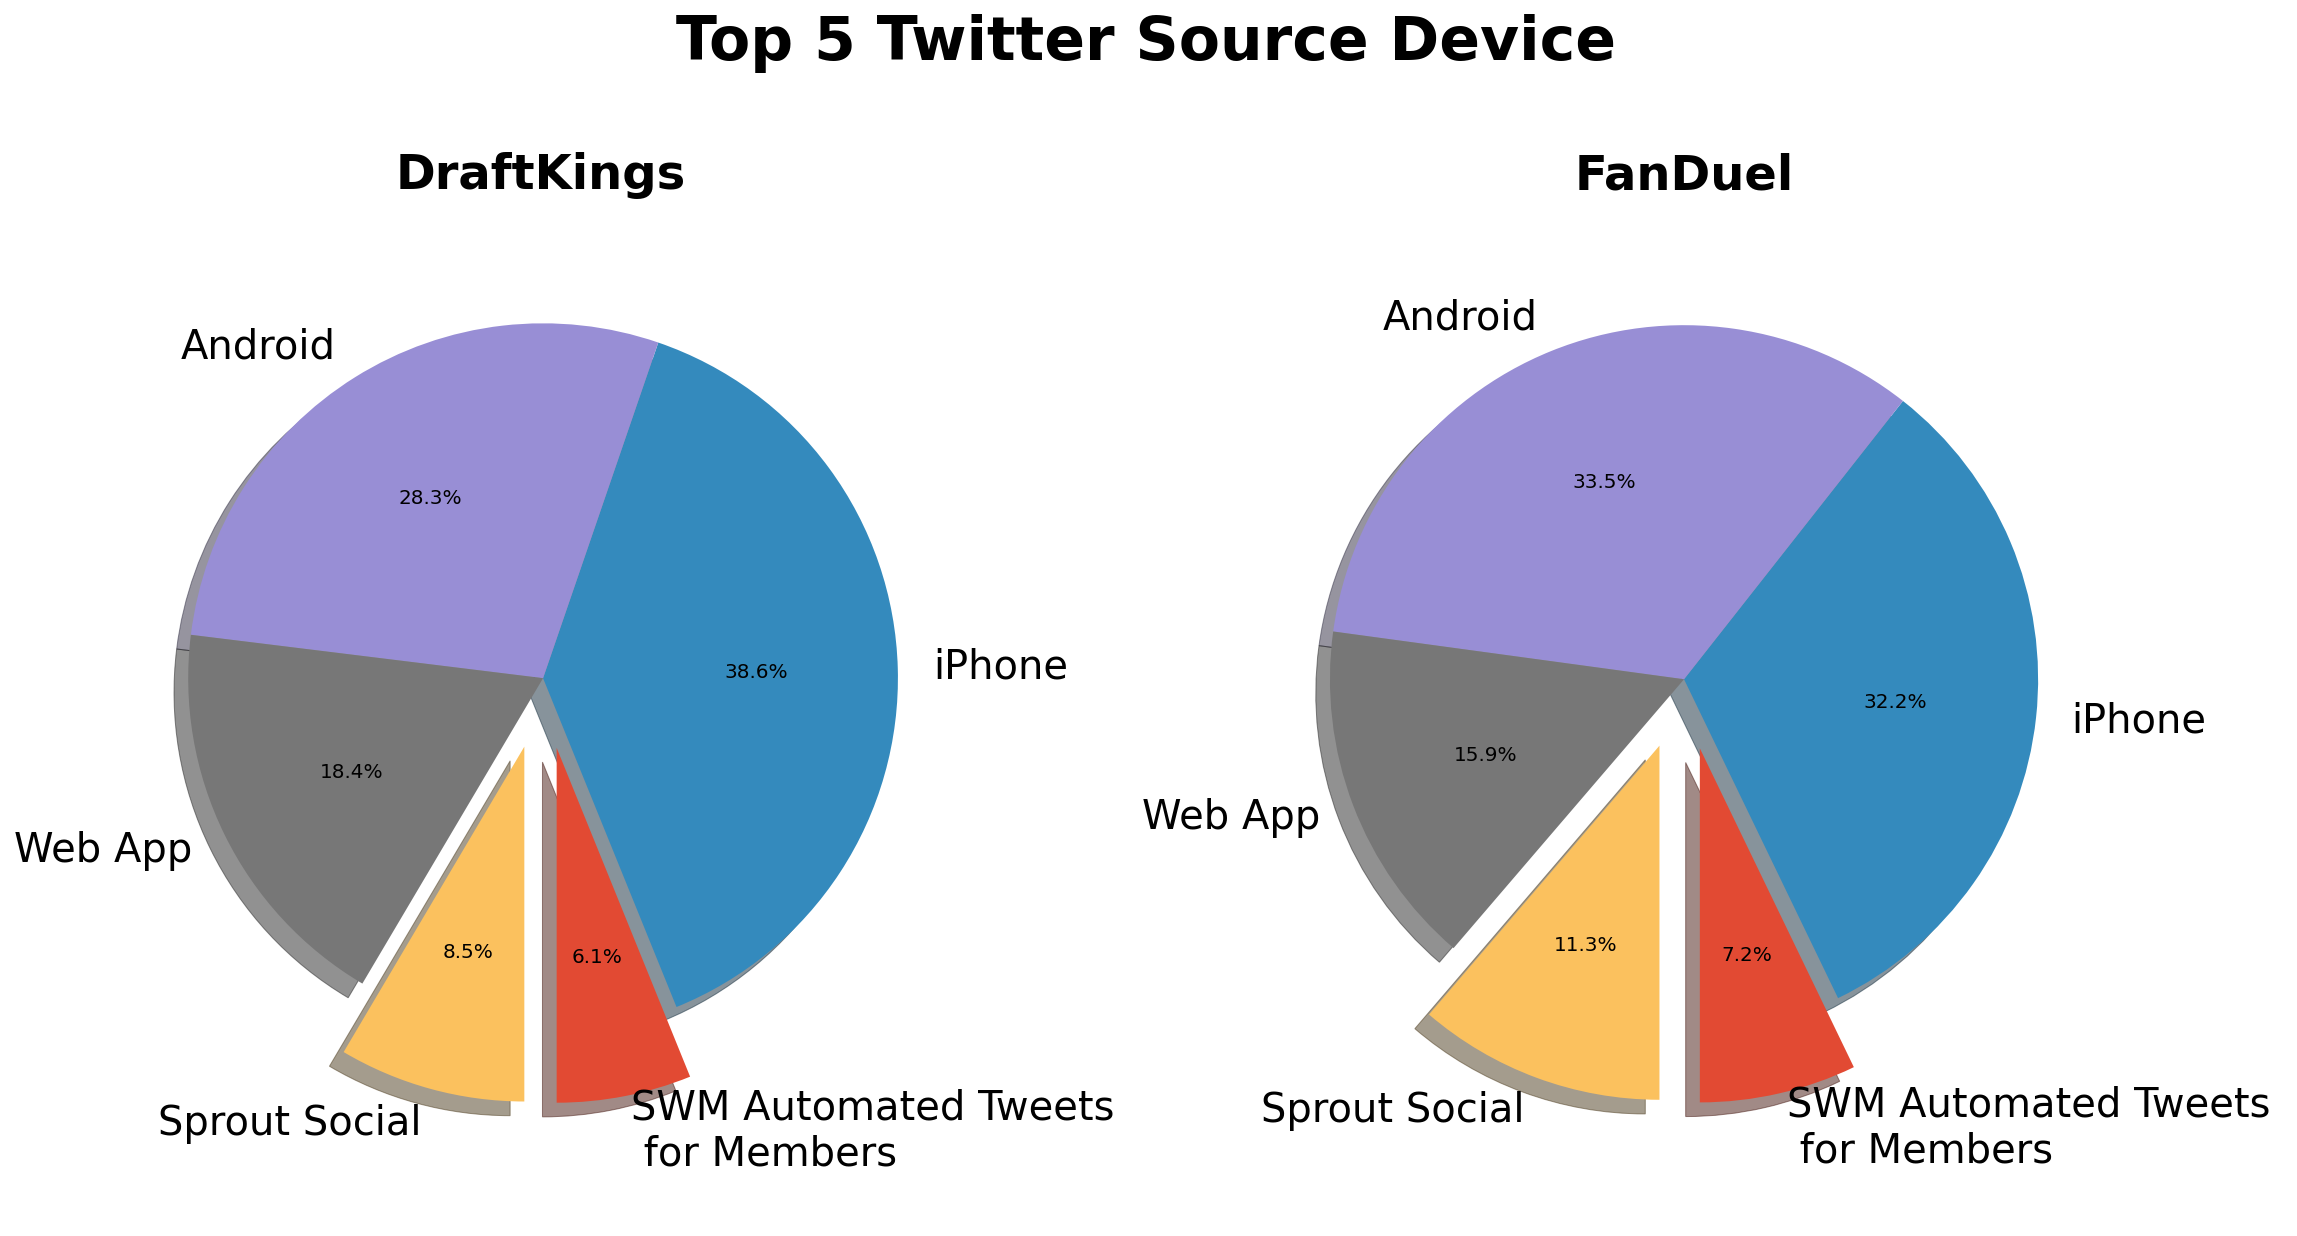

In [560]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))

dk_labels = 'SWM Automated Tweets \n for Members','iPhone', 'Android', 'Web App', 'Sprout Social' 
dk_sizes = [464, 2919, 2141, 1395, 643]
dk_explode = (.2, 0, 0, 0, .2)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax1.pie(dk_sizes, explode=dk_explode, labels=dk_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('DraftKings', fontsize = 24, fontweight='bold')

fd_labels = 'SWM Automated Tweets \n for Members','iPhone', 'Android', 'Web App', 'Sprout Social' 
fd_sizes = [374, 1683, 1747, 829, 589]
fd_explode = (.2, 0, 0, 0, .2)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = 
.0
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('FanDuel',fontsize = 24, fontweight='bold')


fig.suptitle('Top 5 Twitter Source Device', fontsize=30, fontweight ='bold').set_position([.5, 1.1])
plt.tight_layout()
plt.savefig('Source Device', bbox_inches='tight')
plt.show()

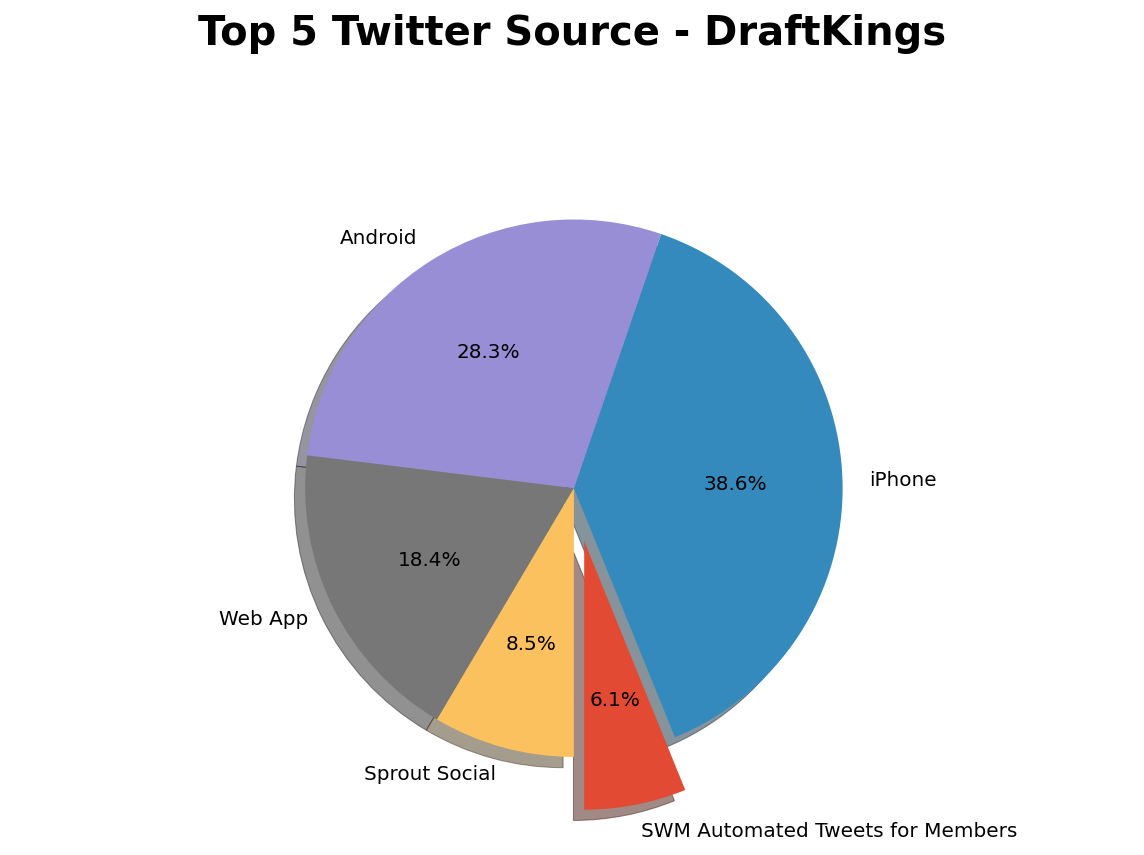

In [561]:
#Draftkings
# plt.rcParams['font.size'] = 13.0
labels = 'SWM Automated Tweets for Members','iPhone', 'Android', 'Web App', 'Sprout Social' 
sizes = [464, 2919, 2141, 1395, 643]
explode = (.2, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Top 5 Twitter Source - DraftKings', fontsize=20, fontweight ='bold').set_position([.5, 1.2])

plt.savefig('Source Device', bbox_inches='tight')
plt.show()

In [562]:
sprout_social = dk_df[dk_df.source == 'Sprout Social']
sprout_social.username.unique()


array(['Awesemo_Com', 'AwesemoGolf', 'AwesemoNFL', 'FTNNetwork',
       'FTNDaily', 'AwesemoEsports', 'AwesemoMMADFS', 'Autodraftshow',
       'GoldenMardiGras'], dtype=object)

In [563]:
SWM_automated = dk_df[dk_df.source == 'SWM Automated Tweets For Members']
SWM_automated.username.unique() #all from user:sportswatch1

array(['SportsWatch1'], dtype=object)

In [564]:
dk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8931 entries, 0 to 8930
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         8931 non-null   object
 1   text            8931 non-null   object
 2   username        8931 non-null   object
 3   location        6491 non-null   object
 4   follower count  8931 non-null   int64 
 5   friend count    8931 non-null   int64 
 6   retweet         8931 non-null   int64 
 7   source          8374 non-null   object
dtypes: int64(3), object(5)
memory usage: 558.3+ KB


In [565]:
dk_df['location'].value_counts().head(20)

Chicago, IL                650
Pasadena, California       541
Las Vegas, NV              531
United States              253
Massachusetts, USA         186
England, United Kingdom    178
Henderson, Nevada          136
Boston, MA                 123
Winners Lane               88 
New Jersey, USA            75 
Chicago, Illinois          55 
Sha tin                    54 
Novosibirsk                53 
Tsuen Wan                  53 
Jersey                     50 
Yekaterinburg              45 
Indianapolis, IN           44 
Moscow                     43 
New York, NY               41 
Yuen Long Kau Hui          40 
Name: location, dtype: int64

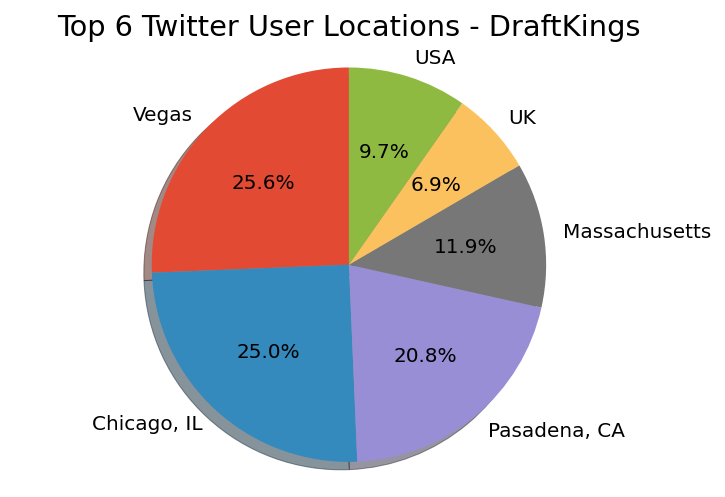

In [566]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Vegas', 'Chicago, IL', 'Pasadena, CA', 'Massachusetts', 'UK', 'USA'
sizes = [666, 650, 541, 309, 178, 253]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 6 Twitter User Locations - DraftKings')
plt.show()

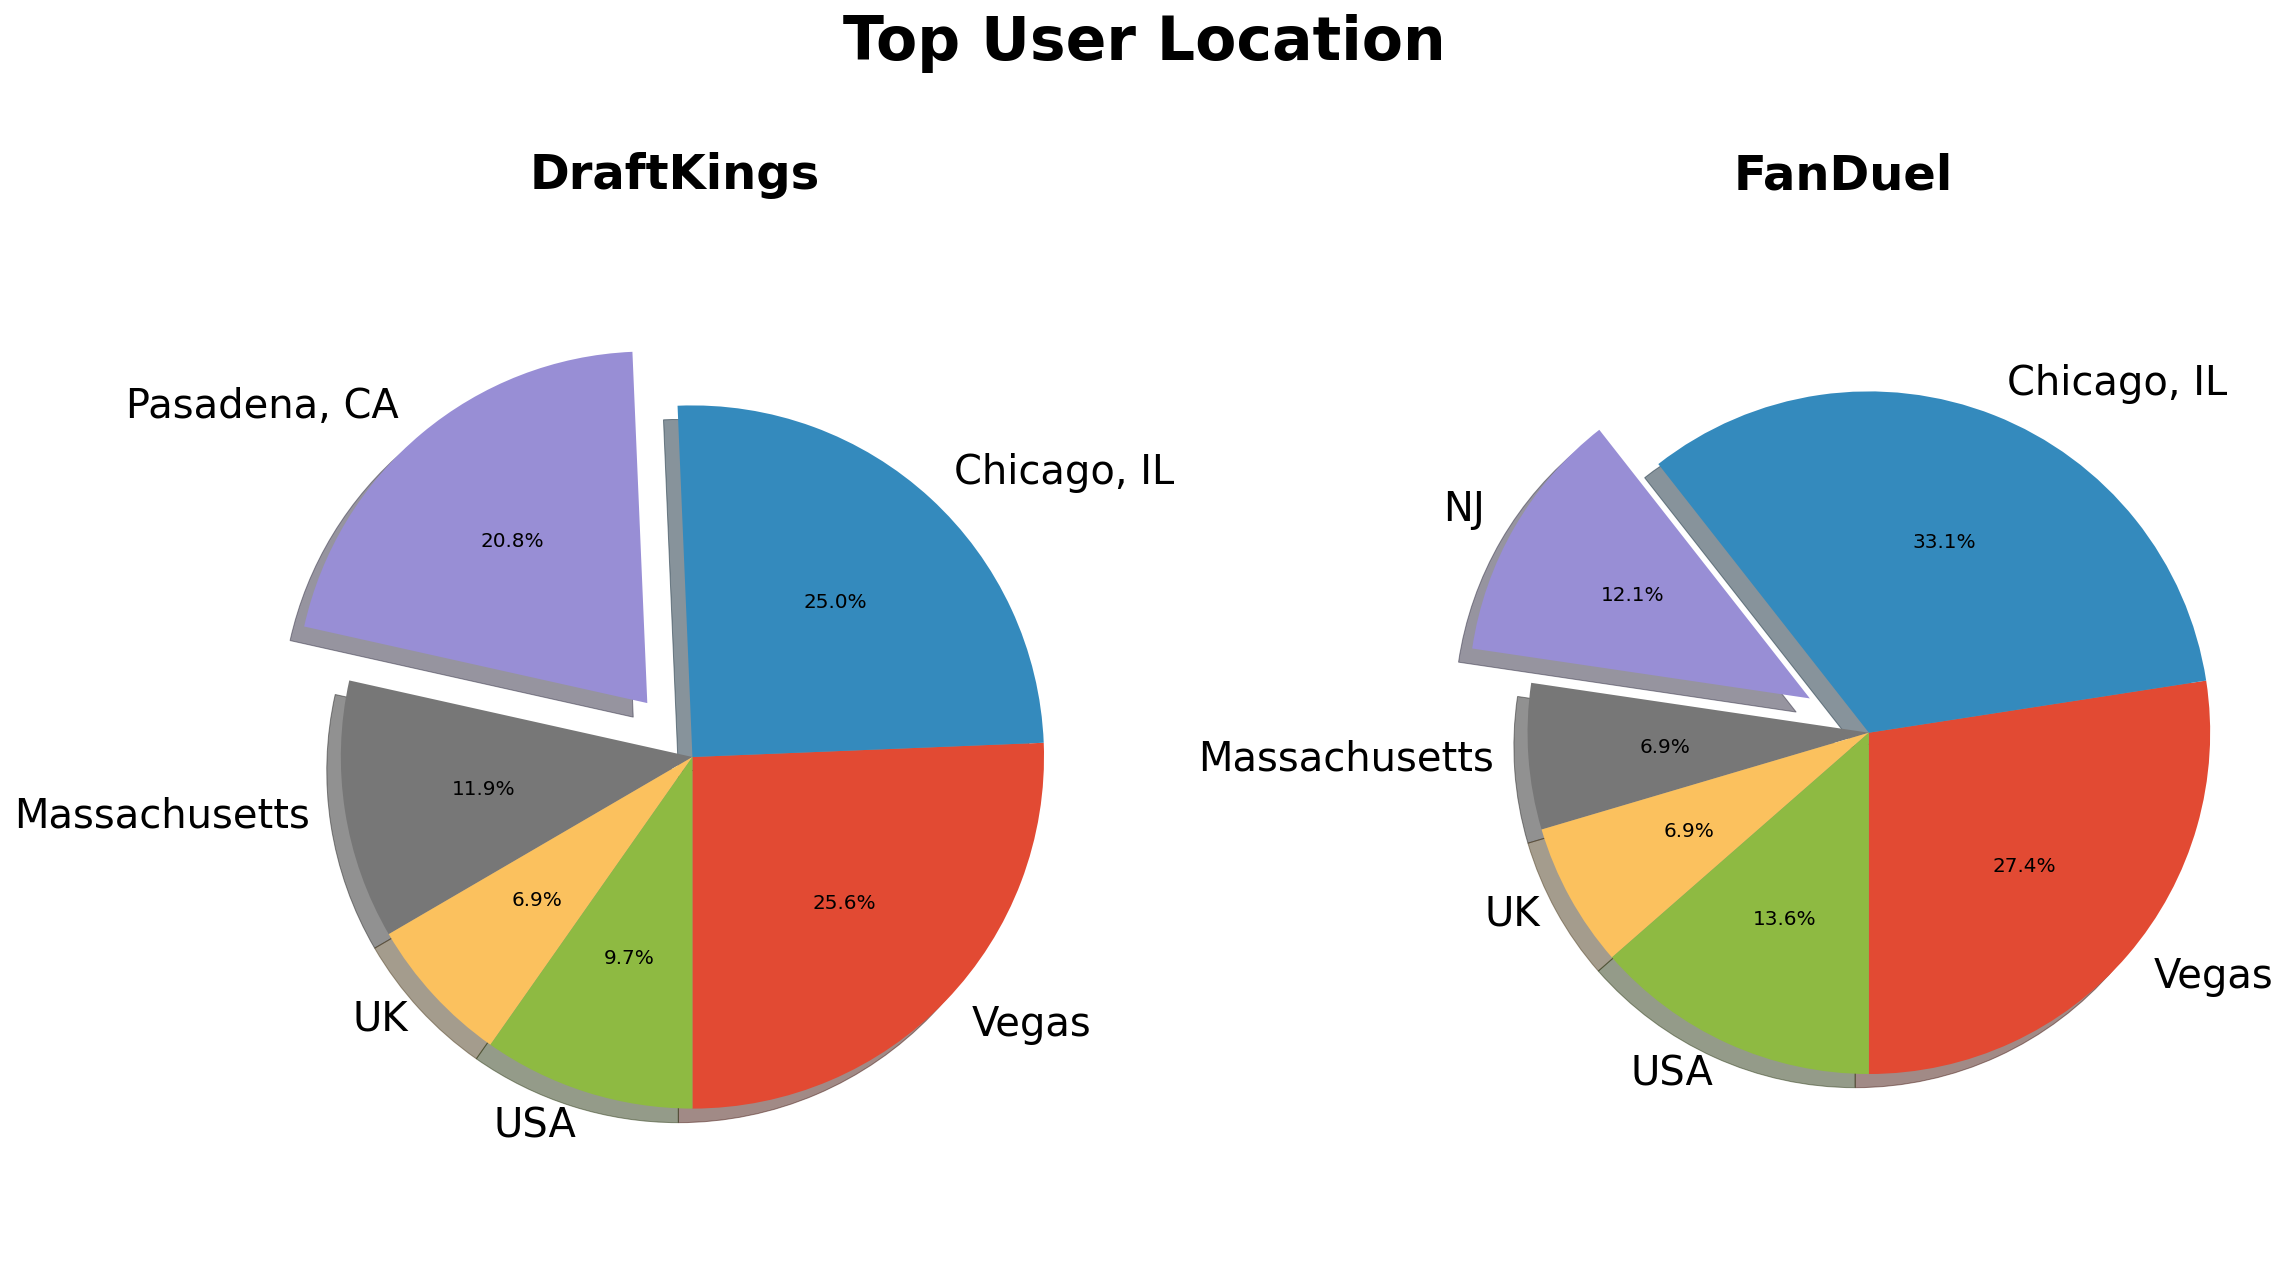

In [567]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))

dk_labels = 'Vegas', 'Chicago, IL', 'Pasadena, CA', 'Massachusetts', 'UK', 'USA'
dk_sizes = [666, 650, 541, 309, 178, 253]
dk_explode = (0, 0, .2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax1.pie(dk_sizes, explode=dk_explode, labels=dk_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('DraftKings', fontsize = 24, fontweight='bold')

fd_labels = 'Vegas', 'Chicago, IL', 'NJ', 'Massachusetts', 'UK', 'USA'
fd_sizes = [520, 628, 229, 131, 130, 257]
fd_explode = (0, 0, .2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax2.pie(fd_sizes, explode=fd_explode, labels=fd_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('FanDuel',fontsize = 24, fontweight='bold')


fig.suptitle('Top User Location', fontsize=30, fontweight ='bold').set_position([.5, 1.1])
plt.tight_layout()
plt.savefig('User Location', bbox_inches='tight')
plt.show()

### Looking into the retweets for anomolies - discovered that the higher retweets are mostly people promoting their product or offering free products

In [568]:
dk_df.retweet.value_counts()[:10]

0      3188
1      1454
632    613 
2      562 
3      279 
251    246 
4      168 
53     156 
36     144 
8      122 
Name: retweet, dtype: int64

In [569]:
sprout_df = dk_df[dk_df.source == 'Sprout Social']
sprout_df

,created,text,username,location,follower count,friend count,retweet,source
10,12/01/2020,b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoGolf PGA DFS Strategy Show: #MayakobaClassic w/ @JazzrazDFS &amp; @FantasyGolfMan\n\n#draftkings\xe2\x80\xa6 https://t.co/tBkkglCmPy',Awesemo_Com,"Chicago, IL",25663,592,1,Sprout Social
11,12/01/2020,b'\xf0\x9f\x9a\xa8LIVE NOW\n\nThe @AwesemoGolf PGA DFS Strategy Show: Fantasy Golf Picks with @JazzrazDFS &amp; @FantasyGolfMan\n\n#dfs #pga\xe2\x80\xa6 https://t.co/f9Vh8lKLHr',Awesemo_Com,"Chicago, IL",25663,592,0,Sprout Social
12,12/01/2020,b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoGolf PGA DFS Strategy Show: #MayakobaClassic w/ @JazzrazDFS &amp; @FantasyGolfMan\n\n#draftkings\xe2\x80\xa6 https://t.co/lkiuJkTgFX',AwesemoGolf,"Chicago, IL",6510,365,1,Sprout Social
13,12/01/2020,b'\xf0\x9f\x9a\xa8LIVE NOW\n\nThe @AwesemoGolf PGA DFS Strategy Show: Fantasy Golf Picks with @JazzrazDFS &amp; @FantasyGolfMan\n\n#dfs #pga\xe2\x80\xa6 https://t.co/JUL6Qvr9CE',AwesemoGolf,"Chicago, IL",6510,365,0,Sprout Social
129,12/01/2020,"b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoNFL DFS Strategy Show: Week 13 First Look &amp; Picks w/ @JazzrazDFS @Loughy_D, &amp; @SalVetriDFS\xe2\x80\xa6 https://t.co/liCDBQJWaw'",AwesemoNFL,"Chicago, IL",8812,191,2,Sprout Social
...,...,...,...,...,...,...,...,...
8410,11/30/2020,"b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoNFL DFS Recap &amp; Lessons Show\n\n@JoshEngleman, @Loughy_D, &amp; @ShipMyMoneyDFS recap Week 12 and\xe2\x80\xa6 https://t.co/yXi5qyvC3V'",Awesemo_Com,"Chicago, IL",25662,592,0,Sprout Social
8436,11/30/2020,b'\xf0\x9f\x9a\xa8\xf0\x9f\x8f\x88FREE for #MNF\xf0\x9f\x8f\x88\xf0\x9f\x9a\xa8\n\nThe @AwesemoNFL DFS Showdown/Single Game Rankings -- #Eagles vs. #Seahawks\xe2\x80\xa6 https://t.co/dRUCLOhcPY',Awesemo_Com,"Chicago, IL",25662,592,0,Sprout Social
8438,11/30/2020,b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoNFL Monday Night Football Showdown Strategy Show -- #Eagles vs. #Seahawks\n\n@Loughy_D |\xe2\x80\xa6 https://t.co/Za6zYKXzpA',AwesemoNFL,"Chicago, IL",8812,191,0,Sprout Social
8439,11/30/2020,b'\xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoNFL Monday Night Football Showdown Strategy Show -- #Seahawks vs. #Eagles\n\n@Loughy_D |\xe2\x80\xa6 https://t.co/3WpSZj58WU',Awesemo_Com,"Chicago, IL",25662,592,0,Sprout Social


In [570]:
panini_bot = dk_df[dk_df.retweet == 632]
panini_df = dk_df[dk_df.text == "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
list(panini_df.username)
#user - @MONEYGANGJAMES1, a lot of bot looking usernames
# vegassyndicate = dk_df[dk_df.retweet == 251]
# list(vegassyndicate.username)
#user = @Vegassyndicate, more actual users

['ukL1XNjBzqw2vcw',
 'kindnesshp',
 'anthoanedawson',
 'Galina97015451',
 'daaamiirna',
 'VilanLia',
 'Shahin74784554',
 '2GkeqS0mhUuBfMq',
 'DKantyshev',
 'polchedonfabian',
 'Y8vIHmtcSXLzEst',
 'njflr7uEmIrDmlJ',
 'Lus86392972',
 'C1XCqvfQQBn3t6l',
 'igor76345046',
 'Aryanazizi11',
 '3yCSr2ShRC5v9Et',
 'Nurkhan61986744',
 'A95474515',
 'artist20406210',
 'SagaraWarnakul1',
 'D1XFtYsNtIATkvT',
 'borovikchek',
 '6FOH1jCQse8a36v',
 'andrey395090268',
 'xOykg6JWBHEXW2V',
 'Vohonius',
 'younesnarouei1',
 'ldfWR4OTl5xkcKB',
 'Upakoi',
 'Leha82597942',
 'houspainting',
 'pupsik89131180',
 'MgXXnO1BBSKrMrG',
 '0FSi2L53U3V058x',
 'bU8mq883bEFIR2o',
 'surgut8186',
 '5buJAtQ7yFYCvh3',
 'TSmurygina',
 'Anarhist881',
 '3Cqy8i2BfJXFUFf',
 'VnEw0KY43WGZdb5',
 'carlosr38172804',
 'yEau19m6pxt6PTG',
 'WqAWRnBYSZVL2zD',
 'Ssashagoldstar',
 'cmcAArmWzqt0pbE',
 'UqJIu3c68vuEaXv',
 'lC6Vlc3H78I3wDc',
 'EljaouhariMouad',
 'IRINA43611694',
 'tA9iNdkxyB3mhPU',
 'pokemon23689889',
 'stella_riera',
 '719oL1iE

In [571]:
bot_usernames = ['6FOH1jCQse8a36v', 'xOykg6JWBHEXW2V', '3Cqy8i2BfJXFUFf', 'WqAWRnBYSZVL2zD', 'UqJIu3c68vuEaXv']
bot_df = panini_df[panini_df.username.isin(bot_usernames)]
bot_df

,created,text,username,location,follower count,friend count,retweet,source
2011,11/29/2020,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',6FOH1jCQse8a36v,NaN,2,113,632,Twitter Web App
2019,11/29/2020,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',xOykg6JWBHEXW2V,NaN,7,472,632,Twitter Web App
2102,11/29/2020,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',3Cqy8i2BfJXFUFf,NaN,6,169,632,Twitter for Android
2141,11/29/2020,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',WqAWRnBYSZVL2zD,NaN,2,151,632,Twitter Web App
2182,11/29/2020,b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\n\nINVEST!\n\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\xe2\x80\xa6',UqJIu3c68vuEaXv,NaN,1,112,632,Twitter for Android


In [572]:
dk_df[dk_df.retweet == 36]
# tagged - @dailysportpickz, giveaway for a RT

,created,text,username,location,follower count,friend count,retweet,source
302,12/01/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',PVerna87,"Hope Mills, NC",287,358,36,Twitter for iPhone
409,12/01/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',hungy79,"Kaukauna, WI",63,224,36,Twitter for iPad
413,12/01/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',FishRulez,"Mount Clemens, MI",174,296,36,Twitter for iPhone
420,12/01/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',TalkFantasyCam,NaN,18,165,36,Twitter for iPhone
421,12/01/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',bikeskateaj1,NaN,60,400,36,Twitter for Android
...,...,...,...,...,...,...,...,...
8186,11/30/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',LunaJavier33,NaN,7,28,36,Twitter Web App
8188,11/30/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',LarsonBrandon,NaN,91,536,36,Twitter for iPhone
8189,11/30/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',volpaul99,NaN,423,901,36,Twitter for iPhone
8190,11/30/2020,b'RT @dailysportpickz: NFL DFS Seahawks v. Eagles GIVEAWAY\nOne Person who RTs will Win the Premium Lineup for Free!\nMust be Following to Ente\xe2\x80\xa6',and1street13,NaN,26,156,36,Twitter for iPhone


In [573]:
dk_df[dk_df.retweet == 53]
# tagged - @dailysportpickz, giveaway for a RT

,created,text,username,location,follower count,friend count,retweet,source
717,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",KnicksRollCall,"New York, USA",52,104,53,Twitter for Android
718,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",G2thAdon,NaN,858,824,53,Twitter for Android
719,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",UpstateApes,Upstate NY,203,694,53,Twitter for Android
720,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",UpstateApeG,Upstate,53,122,53,Twitter for Android
831,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",Beanshockey,NaN,100,184,53,Twitter Web App
...,...,...,...,...,...,...,...,...
8631,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",timdog123dfs,NaN,69,67,53,Twitter for iPhone
8632,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",iEdwinRivera,"Dallas, TX",424,1063,53,Twitter for iPhone
8633,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",Nichola65876203,NaN,129,303,53,Twitter for iPhone
8634,11/30/2020,"b""RT @dailysportpickz: If the Packers win Tonight on #SNF against the Bears I'll give one person who RTs this tweet and Follows Me all of my\xe2\x80\xa6""",ptrckclrss3,United States,18,61,53,Twitter for iPhone


In [574]:
dk_df[dk_df.retweet == 88]
# tagged - @GirlNextDoorBet (Raiders-Chiefs game goingin 9-3)

,created,text,username,location,follower count,friend count,retweet,source
6764,11/24/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",Frankiegee05,"Los Angeles, CA",100,365,88,Twitter for Android
6796,11/24/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",CaposelloJohn,New Jersey,15,91,88,Twitter Web App
6855,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",ChanPan03,New England,783,124,88,Twitter for iPhone
6934,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",2Rich305,"Hialeah Gables, FL",772,1126,88,Twitter for Android
7040,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",JasperChizmm,Da 6- T-DOT-,519,472,88,Twitter for iPhone
...,...,...,...,...,...,...,...,...
7324,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",YinzBetting,"Pittsburgh, PA",119,218,88,Twitter for iPhone
7325,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",MayflowerFarm,NaN,16,18,88,Twitter for iPhone
7326,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",Robert183496214,TENNESSEE,1653,4168,88,Twitter Web App
7327,11/23/2020,"b'RT @GirlNextDoorBet: after a 2-0 sweep on last nights Raiders-Chiefs game, and going 9-3 in NFL 2 weeks in a row\n\nretweet this to get tonig\xe2\x80\xa6'",vinniec21,New jersey,12,46,88,Twitter for Android


In [575]:
dk_df = dk_df[dk_df.text != "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
dk_df = dk_df[dk_df.text != "b'RT @VegasSyndicate: $500 GUARANTEE TODAY...YOU CAN NOT BEAT IT...\\n\\n+ YOU WILL WIN \\xf0\\x9f\\x92\\xb0\\xf0\\x9f\\x92\\xb2\\xf0\\x9f\\x92\\xb4\\xf0\\x9f\\x92\\xb6\\n\\nWE WENT 11-3 IN #CBB / #1 in the\\xf0\\x9f\\x8c\\x8e\\n\\nWE WILL PRINT MO\\xe2\\x80\\xa6'"]        

In [576]:
dk_df.retweet.value_counts()[:10] #it worked! We got ride of moneygangjames and VegasSyndicate promotions

0     3188
1     1454
2     562 
3     279 
4     168 
53    156 
36    144 
8     122 
6     119 
40    108 
Name: retweet, dtype: int64

## FANDUELS EDA - Same moneygangjames and VegasSyndicate promotion

In [577]:
fd_df.shape

(5748, 8)

In [578]:
fd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         5748 non-null   object
 1   text            5748 non-null   object
 2   username        5748 non-null   object
 3   location        4354 non-null   object
 4   follower count  5748 non-null   int64 
 5   friend count    5748 non-null   int64 
 6   retweet         5748 non-null   int64 
 7   source          5742 non-null   object
dtypes: int64(3), object(5)
memory usage: 359.4+ KB


In [579]:
fd_df['location'].value_counts().head(15)

Chicago, IL                573
Las Vegas, NV              420
United States              257
New Jersey, USA            138
Massachusetts, USA         131
England, United Kingdom    130
Henderson, Nevada          100
Brigantine, NJ             91 
Winners Lane               66 
Chicago, Illinois          55 
Global                     55 
Sha tin                    54 
GLOBAL                     54 
Tsuen Wan                  53 
Novosibirsk                53 
Name: location, dtype: int64

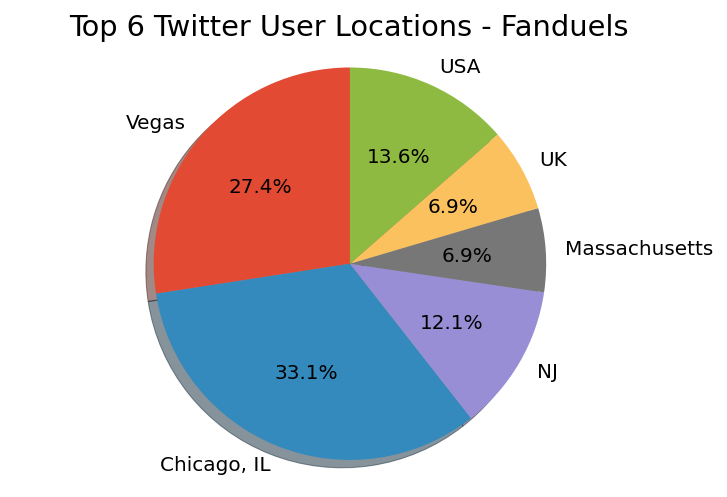

In [580]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Vegas', 'Chicago, IL', 'NJ', 'Massachusetts', 'UK', 'USA'
sizes = [520, 628, 229, 131, 130, 257]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 6 Twitter User Locations - Fanduels')
plt.show()

In [581]:
fd_df.retweet.value_counts()[:10]

0      1712
1      994 
632    611 
2      316 
251    246 
3      198 
8      125 
5      116 
4      99  
12     99  
Name: retweet, dtype: int64

In [582]:
fd_df = fd_df[fd_df.text != "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
fd_df = fd_df[fd_df.text != "b'RT @VegasSyndicate: $500 GUARANTEE TODAY...YOU CAN NOT BEAT IT...\\n\\n+ YOU WILL WIN \\xf0\\x9f\\x92\\xb0\\xf0\\x9f\\x92\\xb2\\xf0\\x9f\\x92\\xb4\\xf0\\x9f\\x92\\xb6\\n\\nWE WENT 11-3 IN #CBB / #1 in the\\xf0\\x9f\\x8c\\x8e\\n\\nWE WILL PRINT MO\\xe2\\x80\\xa6'"]        
fd_df.retweet.value_counts()[:10] #it worked! We got ride of moneygangjames and VegasSyndicate promotions

0     1712
1     994 
2     316 
3     198 
8     125 
5     116 
4     99  
12    99  
9     82  
27    81  
Name: retweet, dtype: int64

### Lot of common users between draftkings and fanduels so create new df with exclusive users

In [583]:
len(dk_df.username.unique()) # 2789
len(fd_df.username.unique()) # 2076

1223

In [584]:
common_users = pd.merge(dk_df.username, fd_df.username, how ='inner', on =['username']).username.unique()
len(common_users) #1724
#1724 twitter users in common out of 2789 unique users in draftkings, 2076 twitter users in fanduels

871

In [585]:
all_users = pd.merge(dk_df, fd_df, how = 'outer', on =['username']).username.unique()
len(all_users) #3141

2294

In [586]:
all_users = list(all_users)
common_users = list(common_users)

exclusive_user = []
for user in all_users:
    if user not in common_users:
        exclusive_user.append(user)

exclusive_users = pd.Series(exclusive_user)
        

In [587]:
len(exclusive_users)

1423

In [588]:
dk_df_exclusive = dk_df[~dk_df.username.isin(exclusive_users)]
dk_df_exclusive.shape

(5257, 8)

In [589]:
fd_df_exclusive = fd_df[~fd_df.username.isin(exclusive_users)]
fd_df_exclusive.shape

(4319, 8)

## PICKLE for future use

In [442]:
import pickle

In [443]:
dk_df_exclusive.to_pickle("data/dk_exclusive.pkl")
fd_df_exclusive.to_pickle("data/fd_exclusive.pkl")